In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import dill

In [4]:
Xt = dill.load(open('data/matrix/X_tfidf_full','rb'))

In [5]:
doc_topic_prob = pd.read_csv('data/doc_topic_prob.csv')

In [7]:
Xt_array = Xt.toarray()

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
sim_matrix = cosine_similarity(Xt_array,Xt_array)

In [19]:
sim_matrix.shape

(5891, 5891)

In [23]:
df_similarity = pd.DataFrame(sim_matrix)
df_similarity.to_csv('data/similarity.csv')

In [11]:
import re
drop_col = list(filter(lambda x: re.search('Unnamed:*', x), doc_topic_prob.columns))
doc_topic_prob.drop(drop_col, axis = 1, inplace = True)

In [15]:
a = doc_topic_prob.idxmax(axis=0).sort_values()
a

luxury goods                    97
wto                            111
agriculture                    182
opinions                       490
taiwan strait defense          572
aus & nz                       604
automobile                     901
energy resource               1533
journalism                    2051
investment                    2504
high tech                     2643
economy                       3522
social media                  3991
imf & indonesia               4233
stock market                  4534
thailand & vietnam tourism    5090
aircraft                      5844
dtype: int64

In [14]:
indexs = a.index.format()
col_dict = {}
for i in range(len(a)):
    col_dict[i] = indexs[i]
col_dict

{0: 'luxury goods',
 1: 'wto',
 2: 'agriculture',
 3: 'opinions',
 4: 'taiwan strait defense',
 5: 'aus & nz',
 6: 'automobile',
 7: 'energy resource',
 8: 'journalism',
 9: 'investment',
 10: 'high tech',
 11: 'economy',
 12: 'social media',
 13: 'imf & indonesia',
 14: 'stock market',
 15: 'thailand & vietnam tourism',
 16: 'aircraft'}

In [20]:
typical_doc = sim_matrix[a]

In [22]:
typical_doc.shape

(17, 5891)

In [24]:
df = pd.read_csv('data/metadata.csv',index_col='Unnamed: 0')

In [26]:
# Plots the similarity score vs. published date
def timeplot(index):
    temp = pd.concat([df.publish_date,df_similarity[index]],axis=1)
    temp.sort_values('publish_date',ascending=True,inplace=True)
    plt.figure(figsize=(5,3), dpi=300)
    plt.scatter(temp.publish_date,temp[index],alpha=0.3)
    x = np.linspace(1,6,6)
    labels = ['10-10','10-15','10-20','10-25','10-30','11-04']
    plt.xticks(rotation=60);

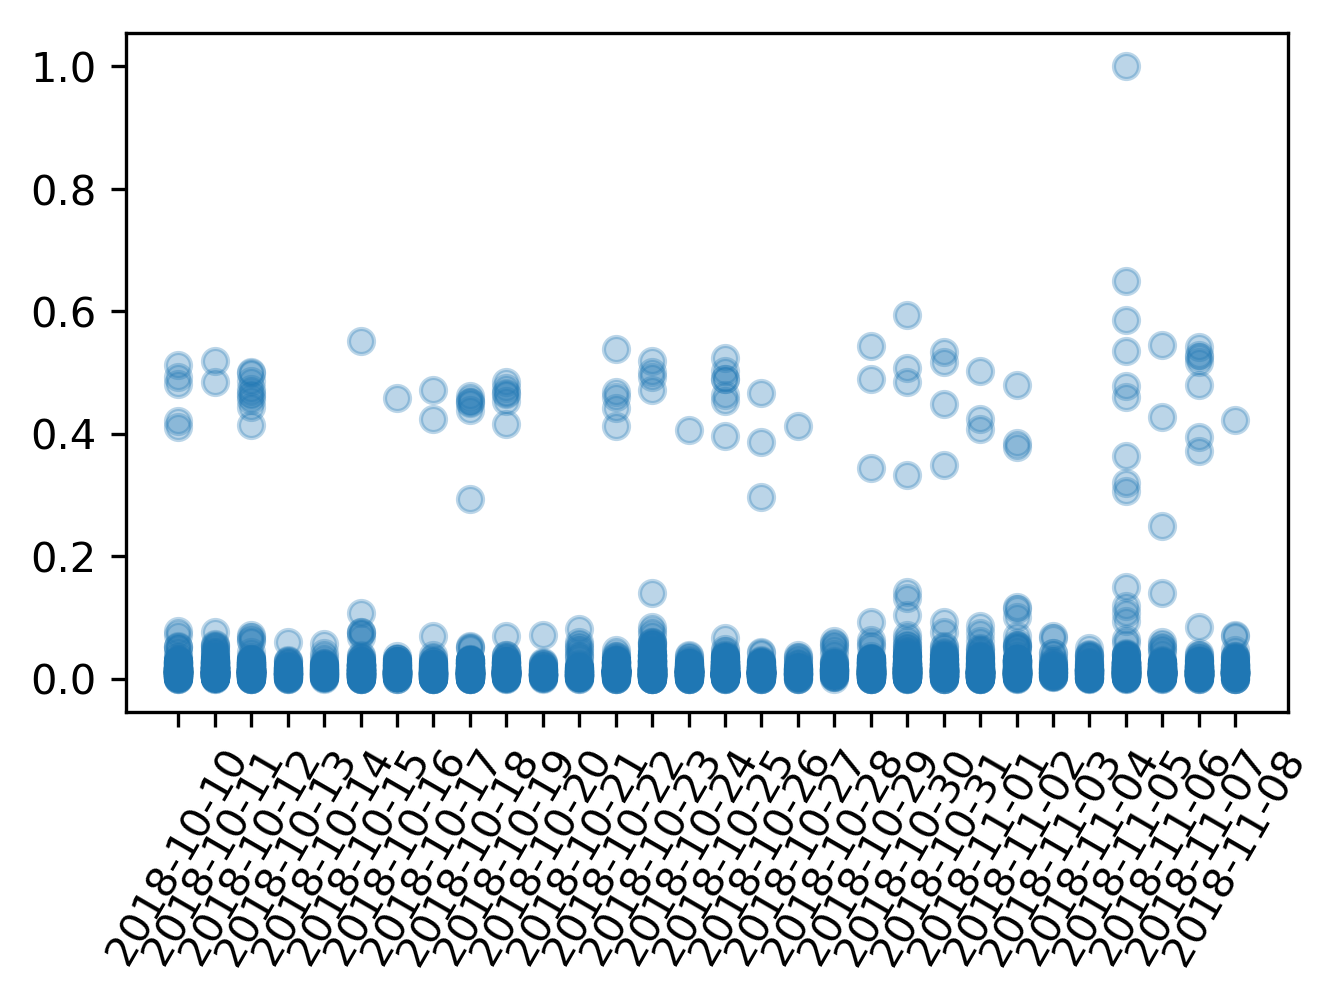

In [31]:
timeplot(200)

In [33]:
# Store typical article's similarity scores with all other articles to build up a tableau dashboard
temp = pd.DataFrame(typical_doc).apply(lambda x: round(x,3)).T
temp.rename(mapper=col_dict,axis=1,inplace=True)
df_timeplot = pd.concat([df,temp], axis=1)
df_timeplot.head(2)

,description,source,title,url,publish_date,topic,sentiment,luxury goods,wto,agriculture,...,energy resource,journalism,investment,high tech,economy,social media,imf & indonesia,stock market,thailand & vietnam tourism,aircraft
0,"Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04,others,0,0.012,0.023,0.030,...,0.023,0.024,0.021,0.007,0.003,0.051,0.020,0.023,0.039,0.006
1,"Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06,others,0,0.022,0.051,0.028,...,0.021,0.016,0.022,0.009,0.002,0.041,0.015,0.016,0.044,0.003


In [34]:
df_timeplot.to_csv('data/tableau.csv')